Limpeza e análise de um conjunto de dados de uma Cafeteria.

# Importação

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import _warnings

# Limpeza

In [5]:
data = pd.read_csv('dirty_cafe_sales.csv')

In [6]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [8]:
data.shape

(10000, 8)

In [37]:
data.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [9]:
data.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Remoção de colunas desnecessárias para análise

In [10]:
data.drop('Transaction ID', axis=1,inplace=True)
data.head(10)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


Mostrando os tipos de dados de cada coluna para converter apropriamente

In [40]:
data.dtypes

Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [11]:
# 'Quantity' e 'Price per Unit' para valores numericos
data['Quantity'] = pd.to_numeric(data['Quantity'],errors='coerce')
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce')

# 'Transaction Date' para formato de data
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')

Preechendo os campos vazios

In [12]:
# Preenchendo para 'Others' os campos categóricos
categorical_fields = ['Item','Payment Method','Location']
data[categorical_fields] = data[categorical_fields].fillna('Others')

# Preenchendo para a média os campos númericos
numerical_fields = ['Quantity','Price Per Unit']
data[numerical_fields] = data[numerical_fields].fillna(data[numerical_fields].mean())

In [13]:
data.loc[data['Payment Method'] == 'UNKNOWN', 'Payment Method'] = 'Others'
data.loc[data['Location'] == 'UNKNOWN', 'Location'] = 'Others'

In [14]:
data.isnull().sum()

Item                  0
Quantity              0
Price Per Unit        0
Total Spent         173
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

Preenchendo os valores faltando na coluna 'Price Per Unit' com a media dos valores da coluna

In [15]:
data['Price Per Unit'] = data.groupby('Item')['Price Per Unit'].transform(
    lambda x: x.fillna(x.mean())
)

Calculando Total Spent como Quantity * Price Per Unit, para completar os valores faltantes em Total Spent

In [16]:
data['Total Spent'] = data['Quantity']*data['Price Per Unit']
data

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2.0,2.000000,4.000000,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.000000,12.000000,Cash,In-store,2023-05-16
2,Cookie,4.0,1.000000,4.000000,Credit Card,In-store,2023-07-19
3,Salad,2.0,5.000000,10.000000,Others,Others,2023-04-27
4,Coffee,2.0,2.000000,4.000000,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
9995,Coffee,2.0,2.000000,4.000000,Others,Others,2023-08-30
9996,Others,3.0,2.949984,8.849952,Digital Wallet,Others,2023-06-02
9997,Coffee,4.0,2.000000,8.000000,Digital Wallet,Others,2023-03-02
9998,Cookie,3.0,2.949984,8.849952,Digital Wallet,Others,2023-12-02


In [17]:
data.isnull().sum()

Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

Preenchendo os valores faltando em 'Transaction Date' para 'Unkown'

In [18]:
data['Transaction Date'].fillna('Others',inplace=True)
data.isnull().sum()

C:\Users\bmendes\AppData\Local\Temp\ipykernel_37072\163488797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Transaction Date'].fillna('Others',inplace=True)
C:\Users\bmendes\AppData\Local\Temp\ipykernel_37072\163488797.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Others' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data['Transaction Date'].fillna('Others',inplace=True)


Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [82]:
data['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'Others', 'ERROR', 'Juice', 'Tea'], dtype=object)

Apagando as linhas com itens com erro porque não são uteis para a análise

In [19]:
data = data[data['Item'] != 'UNKNOWN']
data = data[data['Item'] != 'ERROR']
data = data[data['Item'] != 'Others']

In [20]:
data.head(10)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08 00:00:00
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16 00:00:00
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19 00:00:00
3,Salad,2.0,5.0,10.0,Others,Others,2023-04-27 00:00:00
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11 00:00:00
5,Smoothie,5.0,4.0,20.0,Credit Card,Others,2023-03-31 00:00:00
7,Sandwich,4.0,4.0,16.0,Cash,Others,2023-10-28 00:00:00
9,Sandwich,5.0,4.0,20.0,Others,In-store,2023-12-31 00:00:00
10,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07 00:00:00
11,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,Others


Adicionando colunas de dia, mês e ano para ajudar na análise

In [21]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')
data.dropna(subset=['Transaction Date'], inplace=True)

data['day'] = data.loc[:,'Transaction Date'].dt.day
data['month'] = data.loc[:,'Transaction Date'].dt.month
data['year'] = data.loc[:,'Transaction Date'].dt.year

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item              8613 non-null   object        
 1   Quantity          8613 non-null   float64       
 2   Price Per Unit    8613 non-null   float64       
 3   Total Spent       8613 non-null   float64       
 4   Payment Method    8613 non-null   object        
 5   Location          8613 non-null   object        
 6   Transaction Date  8613 non-null   datetime64[ns]
 7   day               8613 non-null   int32         
 8   month             8613 non-null   int32         
 9   year              8613 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(3)
memory usage: 639.2+ KB


In [22]:
data.head(10)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,day,month,year
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,8,9,2023
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,16,5,2023
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,19,7,2023
3,Salad,2.0,5.0,10.0,Others,Others,2023-04-27,27,4,2023
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,11,6,2023
5,Smoothie,5.0,4.0,20.0,Credit Card,Others,2023-03-31,31,3,2023
7,Sandwich,4.0,4.0,16.0,Cash,Others,2023-10-28,28,10,2023
9,Sandwich,5.0,4.0,20.0,Others,In-store,2023-12-31,31,12,2023
10,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,7,11,2023
12,Sandwich,2.0,4.0,8.0,Cash,In-store,2023-05-03,3,5,2023


# Análise de Vendas e Receita

Qual o total de receita gerado por cada item?

In [23]:
receita_total = data.groupby(data['Item'])['Total Spent'].sum().reset_index()
receita_total = receita_total.sort_values(by='Total Spent', ascending=False)
receita_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 4 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item         8 non-null      object 
 1   Total Spent  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [24]:
receita_total.head(10)

,Item,Total Spent
4,Salad,16195.896869
5,Sandwich,12890.084749
6,Smoothie,12638.155228
3,Juice,10047.839707
0,Cake,9830.385927
1,Coffee,6994.876433
7,Tea,4976.855432
2,Cookie,3439.652908


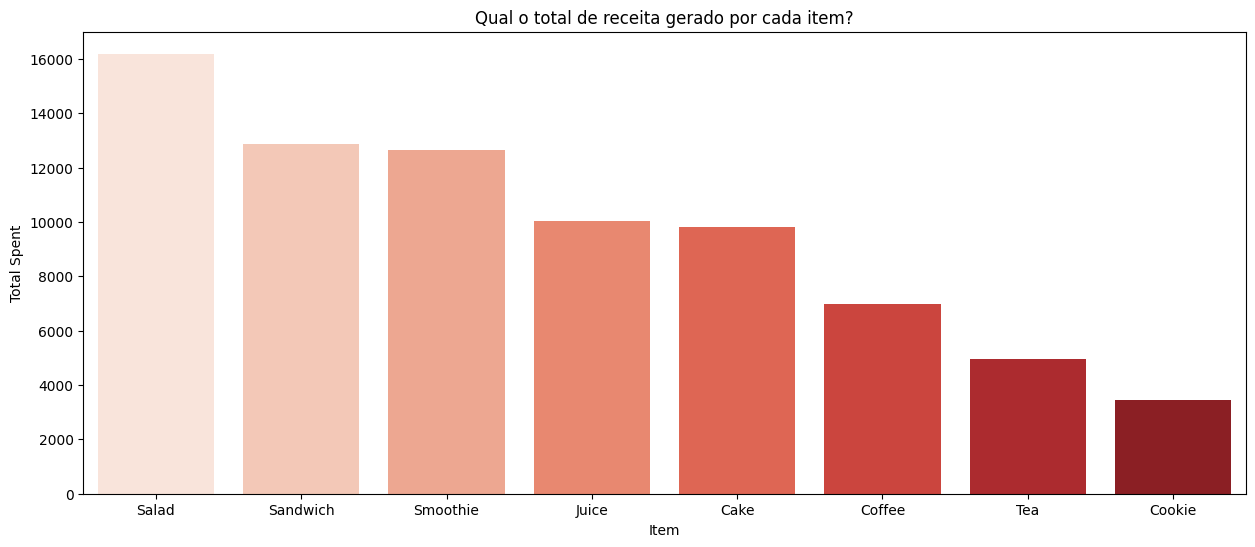

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item', y='Total Spent', data=receita_total, palette='Reds', hue='Item')
plt.title('Qual o total de receita gerado por cada item?')
plt.xlabel('Item')
plt.ylabel('Total Spent')
plt.show()

Qual o item mais pedido?

In [26]:
mais_pedido = data.groupby(data['Item'])['Quantity'].sum().reset_index()
mais_pedido = mais_pedido.sort_values(by='Quantity', ascending=False)
mais_pedido.head()

,Item,Quantity
1,Coffee,3426.650877
3,Juice,3352.280853
4,Salad,3315.451633
0,Cake,3279.280853
5,Sandwich,3267.679340


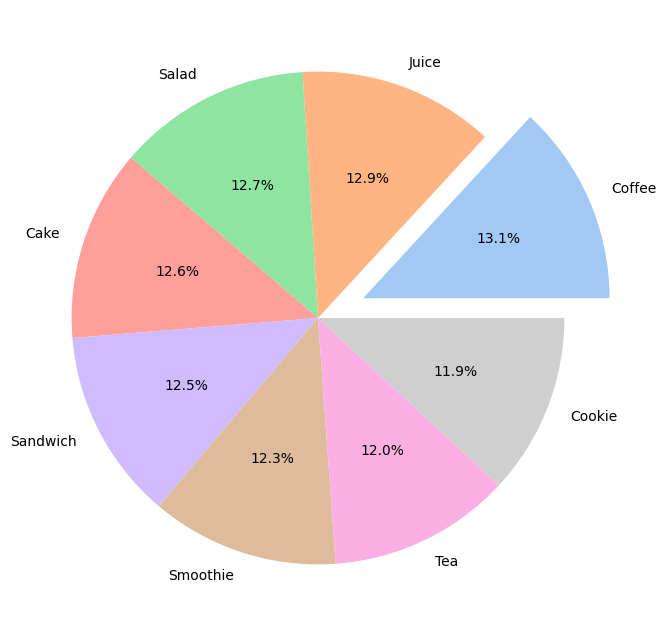

In [27]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')

explode = [0.2 if x == mais_pedido['Quantity'].max() else 0 for x in mais_pedido['Quantity']]
plt.pie(mais_pedido['Quantity'], labels=mais_pedido['Item'], explode=explode, colors=colors, autopct='%1.1f%%')
plt.show()

# Análise Temporal

Qual dia da semana a loja vê mais movimento?

In [28]:
data['month_name'] = data['Transaction Date'].dt.month_name(locale='pt_BR')
data['day_name'] = data['Transaction Date'].dt.day_name(locale='pt_BR')

In [32]:
vendas_por_dia = data.groupby(data['day_name'])['Quantity'].sum().round(1).reset_index()
ordem_dia = [0,3,4,1,5,6,2]
vendas_por_dia['ordem_dia'] = ordem_dia
vendas_por_dia = vendas_por_dia.sort_values(by='ordem_dia', ascending=True)
vendas_por_dia = vendas_por_dia.drop(columns='ordem_dia').reset_index(drop=True)
vendas_por_dia

,day_name,Quantity
0,Domingo,3845.9
1,Segunda-feira,3734.1
2,Terça-feira,3678.9
3,Quarta-feira,3545.4
4,Quinta-feira,3778.9
5,Sexta-feira,3804.8
6,Sábado,3683.4


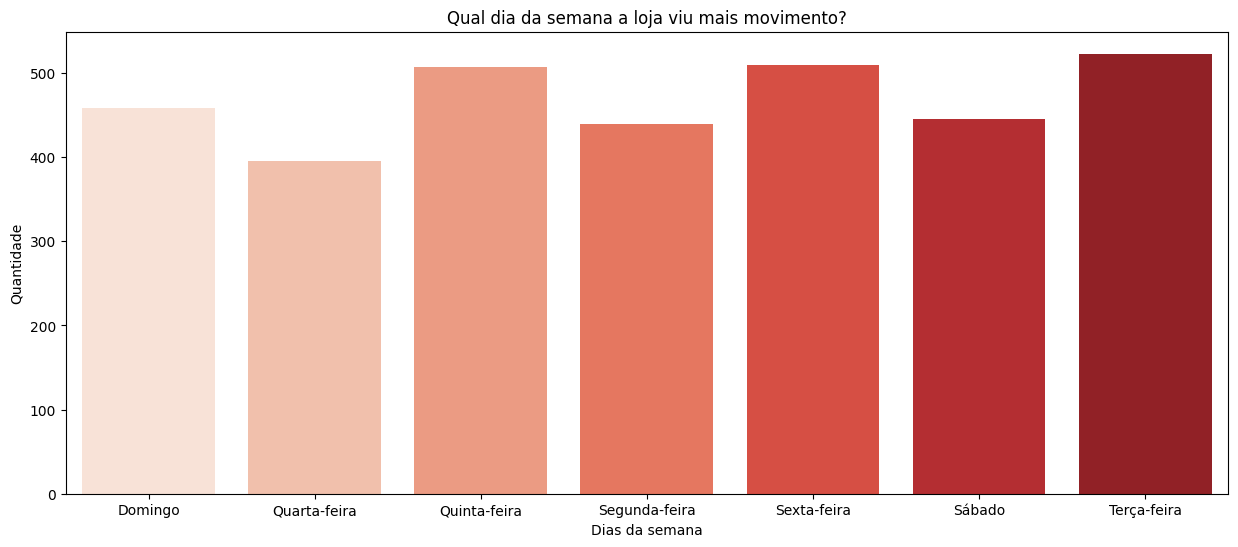

In [121]:
vendas_por_dia_graph = data.groupby(['day_name','Item'])['Quantity'].sum().round(0).reset_index()
vendas_por_dia_graph_cake = vendas_por_dia_graph[vendas_por_dia_graph['Item'] == 'Cake']
plt.figure(figsize=(15,6))
sns.barplot(x='day_name',y='Quantity',data=vendas_por_dia_graph_cake,palette='Reds',hue='day_name')
plt.title('Qual dia da semana a loja viu mais movimento?')
plt.xlabel('Dias da semana')
plt.ylabel('Quantidade')
plt.show()

In [34]:
dia_com_mais_venda = vendas_por_dia.loc[vendas_por_dia['Quantity'].idxmax()]
dia_com_mais_venda

day_name    Domingo
Quantity     3845.9
Name: 0, dtype: object

Qual a renda em diferentes meses?

In [43]:
renda_mes = data.groupby(data['month_name'])['Total Spent'].sum().round(2).reset_index()
ordem_mes = [4,8,12,2,1,7,6,5,3,11,10,9]
renda_mes['ordem_mes'] = ordem_mes
renda_mes = renda_mes.sort_values(by='ordem_mes',ascending=True)
renda_mes = renda_mes.drop(columns='ordem_mes').reset_index(drop=True)
renda_mes

,month_name,Total Spent
0,Janeiro,6681.53
1,Fevereiro,5957.00
2,Março,6512.83
3,Abril,6465.74
4,Maio,6246.28
5,Junho,6677.14
6,Julho,6203.04
7,Agosto,6335.18
8,Setembro,6220.28
9,Outubro,6776.08


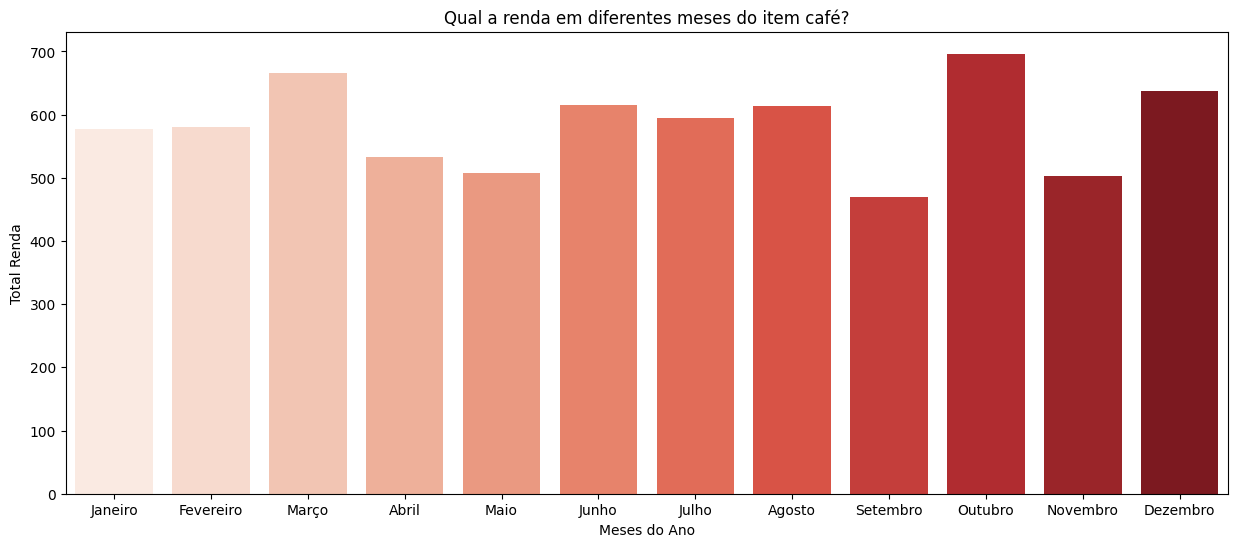

In [70]:
renda_mes_item = data.groupby(['month_name','Item'])['Total Spent'].sum().round(2).reset_index()
renda_mes_coffee = renda_mes_item[renda_mes_item['Item'] == 'Coffee'].reset_index(drop=True)
ordem_mes = [4,8,12,2,1,7,6,5,3,11,10,9]
renda_mes_coffee['ordem_mes'] = ordem_mes
renda_mes_coffee = renda_mes_coffee.sort_values(by='ordem_mes', ascending=True)
renda_mes_coffee = renda_mes_coffee.drop(columns='ordem_mes').reset_index(drop=True)
plt.figure(figsize=(15,6))
sns.barplot(x='month_name',y='Total Spent', data=renda_mes_coffee, palette='Reds', hue='month_name')
plt.title('Qual a renda em diferentes meses do item café?')
plt.xlabel('Meses do Ano')
plt.ylabel('Total Renda')
plt.show()

In [45]:
mes_com_mais_renda = renda_mes.loc[renda_mes['Total Spent'].idxmax()]
mes_com_mais_renda

month_name     Outubro
Total Spent    6776.08
Name: 9, dtype: object

# Picos sazonais

In [71]:
renda_mes_item

,month_name,Item,Total Spent
0,Abril,Cake,810.18
1,Abril,Coffee,532.78
2,Abril,Cookie,225.91
3,Abril,Juice,935.81
4,Abril,Salad,1446.25
...,...,...,...
91,Setembro,Juice,747.06
92,Setembro,Salad,1131.19
93,Setembro,Sandwich,1112.20
94,Setembro,Smoothie,1162.26


Existem picos para os itens mais vendidos, como café e sucos?

In [89]:
picos = data[data['Item'].isin(['Coffee','Juice'])]
renda_mes_picos = picos.groupby(['month_name','Item'])['Total Spent'].sum().round(2).reset_index()

mes_ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
renda_mes_picos['month_name'] = pd.Categorical(renda_mes_picos['month_name'],categories=mes_ordem, ordered=True)
renda_mes_picos = renda_mes_picos.sort_values(by='month_name', ascending=True).reset_index(drop=True)

renda_mes_picos

,month_name,Item,Total Spent
0,Janeiro,Coffee,577.37
1,Janeiro,Juice,923.32
2,Fevereiro,Coffee,579.66
3,Fevereiro,Juice,833.07
4,Março,Juice,923.04
5,Março,Coffee,666.13
6,Abril,Coffee,532.78
7,Abril,Juice,935.81
8,Maio,Juice,827.36
9,Maio,Coffee,507.88


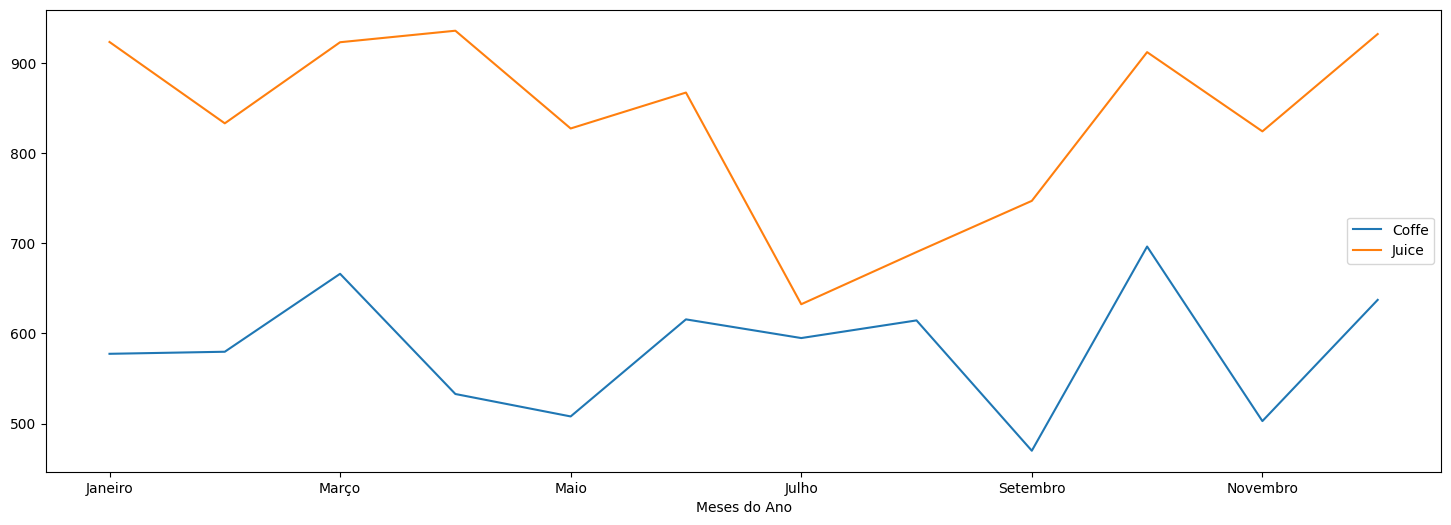

In [120]:
renda_mes_picos_coffee = renda_mes_picos[renda_mes_picos['Item'] == 'Coffee']
renda_mes_picos_juice = renda_mes_picos[renda_mes_picos['Item'] == 'Juice']
renda_mes_picos_graph = pd.merge(renda_mes_picos_coffee,renda_mes_picos_juice,how='inner',on=['month_name'],suffixes=['_Coffee','_Juice'])
renda_mes_picos_graph = renda_mes_picos_graph.drop(columns=['Item_Coffee','Item_Juice'])
renda_mes_picos_graph.plot(x='month_name', xlabel='Meses do Ano', legend=['Coffee','Juice'], figsize=(18,6))
plt.legend(['Coffe','Juice']).set_loc('center right')
